# 0.0. Libraries

In [170]:
import os
import logging
import requests
import warnings
import matplotlib

import numpy           as np
import pandas          as pd
import seaborn         as sns
import dataframe_image as dfi

from bs4                  import BeautifulSoup
from datetime             import datetime as date
from sqlalchemy           import create_engine
from IPython.display      import display_html 
from IPython.display      import display
from IPython.core.display import HTML

## 0.1. Auxiliar Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

## 0.2. Format Setting

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

warnings.filterwarnings('ignore')

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0. Data Extraction

In [65]:
# constants
url_hm = 'https://www2.hm.com/en_us/men/products/jeans.html'

url_macys = 'https://www.macys.com/shop/mens-clothing/mens-jeans?id=11221&edge=hybrid'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36'}

srapy_datetime = date.now().strftime('%Y-%m-%d %H:%M:%S')

## 1.1. Showroom Collect

In [66]:
# Number of Pages
# API Requests
page = requests.get(url=url_hm, headers=headers)

# soup object 
soup = BeautifulSoup( page.text, 'html.parser')

# html from pagination
total_items = soup.find('h2', class_='load-more-heading').get('data-total')

page_number = np.ceil(int(total_items)/36)

In [67]:
# all showroom products url
url = url_hm + '?page-size=' + str(int(page_number * 36))

# new API Requests
page = requests.get(url=url, headers=headers)

# soup object 
soup = BeautifulSoup( page.text, 'html.parser')

In [68]:
# showrrom products
products = soup.find('ul', class_='products-listing small')

# list of products
product_list = products.find_all('article', class_='hm-product-item')

# product id
product_id = [p.get('data-articlecode') for p in product_list]

# product category
product_category = [p.get('data-category') for p in product_list]

# product name
product_name = [p.find('a', class_='link').get_text() for p in product_list]

# product type
product_type = [p.find('a', class_='link').get_text() for p in product_list]

# product price
product_price = [p.find('span', class_='price regular').get_text() for p in product_list]

# number of colors
color_quantity = [p.find('ul', class_='list-swatches').get('data-swatches-total') for p in product_list]

# product link
url_link = 'https://www2.hm.com'
product_href = [url_link + p.find('a', class_='link').get('href') for p in product_list]

# built dataframe
df1_showroom = pd.DataFrame([product_id, product_category, product_name, product_type, product_price, color_quantity, product_href] ).T
df1_showroom.columns = ['product_id', 'product_category', 'product_name', 'product_type', 'product_price', 'color_quantity', 'product_link']

df1_showroom['scrapy_datetime'] = srapy_datetime

In [69]:
df1_showroom.head()

,product_id,product_category,product_name,product_type,product_price,color_quantity,product_link,scrapy_datetime
0,1008549001,men_jeans_regular,Regular Jeans,Regular Jeans,$ 19.99,4,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1013317006,men_jeans_regular,Hybrid Regular Tapered Joggers,Hybrid Regular Tapered Joggers,$ 39.99,7,https://www2.hm.com/en_us/productpage.10133170...,2022-02-14 14:06:49
2,0811993040,men_jeans_regular,Regular Jeans,Regular Jeans,$ 29.99,3,https://www2.hm.com/en_us/productpage.08119930...,2022-02-14 14:06:49
3,0875105018,men_jeans_relaxed,Relaxed Jeans,Relaxed Jeans,$ 29.99,5,https://www2.hm.com/en_us/productpage.08751050...,2022-02-14 14:06:49
4,0979945002,men_jeans_loose,Loose Jeans,Loose Jeans,$ 29.99,3,https://www2.hm.com/en_us/productpage.09799450...,2022-02-14 14:06:49


## 1.2. One Product Collect

In [70]:
# API Requests
url_link = df1_showroom['product_link'][0]

page = requests.get(url=url_link, headers=headers)

# soup object 
soup = BeautifulSoup( page.text, 'html.parser')

### 1.2.1. Color Data Collect

In [71]:
# html from color options
color_list = soup.find_all('a', class_='filter-option')

# color name
color_name = [p.get('data-color') for p in color_list]

# product_id
product_id = [p.get('data-articlecode') for p in color_list]

# product href
url_link = 'https://www2.hm.com'
product_href = [url_link + p.get('href') for p in color_list]

# built dataframe
df1_color = pd.DataFrame([product_id, color_name, product_href]).T
df1_color.columns = ['product_id', 'color_name', 'product_link']

df1_color['scrapy_datetime'] = srapy_datetime

In [72]:
df1_color.head()

,product_id,color_name,product_link,scrapy_datetime
0,1008549001,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1008549002,Denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
2,1008549004,Dark blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
3,1008549006,Black,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
4,1008549008,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49


### 1.2.2. Attributes Data Collect

In [73]:
# html from attributes list
attributes_list = soup.find_all('div', class_='pdp-description-list-item')

# attributes options
attributes_options = [att.find('dt').get_text() for att in attributes_list]

# attributes values
attributes_values = [att.find('dd').get_text() for att in attributes_list]

# built dataframe
df1_attributes = pd.DataFrame(attributes_values).T
df1_attributes.columns = attributes_options

# product name
product_name = soup.find('h1', 'primary product-item-headline').get_text()

# product price
product_price = soup.find('div', class_='primary-row').get_text()

# join product id, name and price
product_id = pd.DataFrame({'product_id': [df1_color['product_id'][0]]})
attribute_name = pd.DataFrame({'product_name': [product_name]})
attribute_price = pd.DataFrame({'product_price': [product_price]})

df1_attributes = pd.concat([product_id, df1_attributes, attribute_name, attribute_price], axis=1)

df1_attributes['scrapy_datetime'] = srapy_datetime

In [74]:
df1_attributes.head()

,product_id,Fit,Composition,More sustainable materials,Art. No.,product_name,product_price,scrapy_datetime
0,1008549001,\n\nRegular fit\n\n,"\n\nShell: Cotton 98%, Spandex 2%\nPocket lini...",\n\nRecycled cotton 20%\n\n,1008549001,\n\t\t\t\t\t\t\t Regular Jeans,\n\r\n $19.99\n,2022-02-14 14:06:49


## 1.3. Multiple Product Colect

### 1.3.1. Color Data Collect

In [75]:
df1_color = pd.DataFrame()

for i in range(len(df1_showroom)):
    # API Requests
    url_link = df1_showroom['product_link'][i]

    page = requests.get(url=url_link, headers=headers)

    # soup object 
    soup = BeautifulSoup( page.text, 'html.parser')

    # html from color options
    color_list = soup.find_all('a', class_='filter-option')

    # color name
    color_name = [p.get('data-color') for p in color_list]

    # product_id
    product_id = [p.get('data-articlecode') for p in color_list]

    # product href
    url_link = 'https://www2.hm.com'
    product_href = [url_link + p.get('href') for p in color_list]

    # built dataframe
    df_color = pd.DataFrame([product_id, color_name, product_href]).T
    df_color.columns = ['product_id', 'color_name', 'product_link']
    
    # join dataframes
    df1_color = pd.concat([df1_color, df_color], axis=0, ignore_index=True)
    
df1_color = df1_color.drop_duplicates().reset_index(drop=True)

df1_color['scrapy_datetime'] = srapy_datetime

In [76]:
df1_color.head()

,product_id,color_name,product_link,scrapy_datetime
0,1008549001,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1008549002,Denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
2,1008549004,Dark blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
3,1008549006,Black,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
4,1008549008,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49


### 1.3.2. Attributes Data Collect

In [77]:
# guaratee same attributes
attributes = []

for i in range(len(df1_color)):
    # API Requests
    url_link = df1_color['product_link'][i]

    page = requests.get(url=url_link, headers=headers)

    # soup object 
    soup = BeautifulSoup( page.text, 'html.parser')
    # html from attributes list
    attributes_list = soup.find_all('div', class_='pdp-description-list-item')

    # attributes options
    attributes = attributes + [att.find('dt').get_text() for att in attributes_list]
    
    
attributes_columns = list(set(attributes))

df1_attributes = pd.DataFrame(columns=attributes_columns)


for j in range(len(df1_color)):
    # API Requests
    url_link = df1_color['product_link'][j]

    page = requests.get(url=url_link, headers=headers)

    # soup object 
    soup = BeautifulSoup( page.text, 'html.parser')
    
    # html from attributes list
    attributes_list = soup.find_all('div', class_='pdp-description-list-item')

    # attributes options
    attributes_options = [att.find('dt').get_text() for att in attributes_list]

    # attributes values
    attributes_values = [att.find('dd').get_text() for att in attributes_list]

    # built dataframe
    df_attributes = pd.DataFrame(attributes_values).T
    df_attributes.columns = attributes_options

    # product name
    product_name = soup.find('h1', 'primary product-item-headline').get_text()

    # product price
    product_price = soup.find('div', class_='primary-row').get_text()

    # join product id, name and price
    product_id = pd.DataFrame({'product_id': [df1_color['product_id'][j]]})
    attribute_name = pd.DataFrame({'product_name': [product_name]})
    attribute_price = pd.DataFrame({'product_price': [product_price]})
    
    df_attributes = pd.concat([product_id, attribute_name, attribute_price, df_attributes], axis=1)
    
    # guaratee same attributes
    df1_attributes = pd.concat([df_attributes, df1_attributes], axis=0, ignore_index=True)

df1_attributes['scrapy_datetime'] = srapy_datetime

In [78]:
df1_attributes.head()

,product_id,product_name,product_price,Fit,Composition,Art. No.,Size,More sustainable materials,Product safety,scrapy_datetime
0,0868115007,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $20.99\n,\n\nSkinny fit\n\n,"\n\nPocket lining: Polyester 65%, Cotton 35%\n...",0868115007,NaN,NaN,NaN,2022-02-14 14:06:49
1,0868115006,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 99%, Spandex 1%\nPocket lini...",0868115006,NaN,NaN,NaN,2022-02-14 14:06:49
2,0868115005,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,\n\nPocket lining: Cotton 100%\nShell: Cotton ...,0868115005,NaN,NaN,NaN,2022-02-14 14:06:49
3,0868115004,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 89%, Polyester 10%, Spandex ...",0868115004,NaN,NaN,NaN,2022-02-14 14:06:49
4,0868115003,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $12.99\n,\n\nSkinny fit\n\n,"\n\nCotton 98%, Spandex 2%\n\n",0868115003,NaN,NaN,NaN,2022-02-14 14:06:49


### 1.3.3. Join Data Collect

In [82]:
df1_details = pd.concat([df1_color, df1_attributes.drop('product_id', axis=1)], axis=1)

df1_details = df1_details.drop('scrapy_datetime', axis=1)

df1_details['model_code'] = df1_details['product_id'].apply(lambda x: x[:-3])

df1_showroom['model_code'] = df1_showroom['product_id'].apply(lambda x: x[:-3])

df1_collect = df1_details.merge(df1_showroom.drop_duplicates(subset=['model_code'])[['model_code', 'product_category', 'product_type', 'color_quantity']],
                                 how='left', on='model_code')

df1_collect['scrapy_datetime'] = srapy_datetime

In [83]:
df1_collect.head()

,product_id,color_name,product_link,product_name,product_price,Fit,Composition,Art. No.,Size,More sustainable materials,Product safety,model_code,product_category,product_type,color_quantity,scrapy_datetime
0,1008549001,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $20.99\n,\n\nSkinny fit\n\n,"\n\nPocket lining: Polyester 65%, Cotton 35%\n...",0868115007,NaN,NaN,NaN,1008549,men_jeans_regular,Regular Jeans,4,2022-02-14 14:06:49
1,1008549002,Denim blue,https://www2.hm.com/en_us/productpage.10085490...,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 99%, Spandex 1%\nPocket lini...",0868115006,NaN,NaN,NaN,1008549,men_jeans_regular,Regular Jeans,4,2022-02-14 14:06:49
2,1008549004,Dark blue,https://www2.hm.com/en_us/productpage.10085490...,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,\n\nPocket lining: Cotton 100%\nShell: Cotton ...,0868115005,NaN,NaN,NaN,1008549,men_jeans_regular,Regular Jeans,4,2022-02-14 14:06:49
3,1008549006,Black,https://www2.hm.com/en_us/productpage.10085490...,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 89%, Polyester 10%, Spandex ...",0868115004,NaN,NaN,NaN,1008549,men_jeans_regular,Regular Jeans,4,2022-02-14 14:06:49
4,1008549008,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $12.99\n,\n\nSkinny fit\n\n,"\n\nCotton 98%, Spandex 2%\n\n",0868115003,NaN,NaN,NaN,1008549,men_jeans_regular,Regular Jeans,4,2022-02-14 14:06:49


In [81]:
df1_collect['Composition'].unique()

array(['\n\nPocket lining: Polyester 65%, Cotton 35%\nShell: Cotton 89%, Polyester 10%, Spandex 1%\n\n',
       '\n\nShell: Cotton 99%, Spandex 1%\nPocket lining: Cotton 100%\n\n',
       '\n\nPocket lining: Cotton 100%\nShell: Cotton 87%, Polyester 12%, Spandex 1%\n\n',
       '\n\nShell: Cotton 89%, Polyester 10%, Spandex 1%\nPocket lining: Cotton 100%\n\n',
       '\n\nCotton 98%, Spandex 2%\n\n',
       '\n\nCotton 73%, Polyester 26%, Spandex 1%\n\n',
       '\n\nShell: Cotton 100%\nPocket lining: Polyester 65%, Cotton 35%\n\n',
       '\n\nPocket lining: Polyester 65%, Cotton 35%\nShell: Cotton 100%\n\n',
       '\n\nShell: Cotton 90%, Elasterell-P 8%, Spandex 2%\nPocket lining: Cotton 100%\n\n',
       '\n\nCotton 90%, Elasterell-P 8%, Spandex 2%\n\n',
       '\n\nCotton 79%, Polyester 20%, Spandex 1%\n\n',
       '\n\nCotton 77%, Polyester 21%, Spandex 2%\n\n',
       '\n\nCotton 99%, Spandex 1%\n\n', '\n\nCotton 100%\n\n',
       '\n\nPocket lining: Cotton 100%\nShell: Cotton 9

In [84]:
df1_collect.shape

(191, 16)

# 2.0. Data Transform

In [85]:
def columns_pattern(data):
    #columns name
    cols = list(data.columns)
    
    # remove spaces, characters and convert to snake case
    columns = list(map(lambda x: x.strip().lower().replace(' ', '_').replace(':', '').replace('-', '_').replace('.', ''), cols))
    
    data.columns = columns
    
    return data

def price_format(data):
    # format price columns to float
    data['product_price'] = data['product_price'].apply(lambda x: float(x.replace('$', '').strip()) if pd.notnull(x) else x)
    
    return data

def str_values_pattern(data):
    # select string columns of the dataframe
    columns = list(data.drop(columns='scrapy_datetime').select_dtypes(include='object').columns)
    
    # remove spaces, characters and convert to snake case
    for col in columns:
        data[col] = data[col].apply(lambda x: x.strip().lower().replace(' ', '_') if pd.notnull(x) else x)
        
    return data

def model_code_feature(data):
    # feature unique model code without color info
    data['model_code'] = data['product_id'].apply(lambda x: str(x[:-3]))
    
    # feature color model code from products
    data['color_code'] = data['product_id'].apply(lambda x: str(x[-3:]))
    
    return data

def material_decomposition(data):
    data_columns = np.array(data.columns)

    composition_columns = data.columns.str.contains(':')

    for composition in list(data_columns[composition_columns]):

        # create dataframe for each material
        data_material = data[composition].str.split(',', expand=True).fillna(np.nan)

        # empty list to fill with all materials types
        material_types = []

        # iterable to fill all materials types
        for i in range(len(data_material.columns)):
            material_types += data_material[i].str.extract(r'([A-Z][a-z]+-?\w?).\d')[0].unique().tolist()

        # unique list with materials types
        all_mat_types = list(filter(pd.notna, list(set(material_types))))

        # empty dataframe to store materials type
        df_material = pd.DataFrame(index=range(len(data_material)))

        # iterable to create material dataframe
        for i in range(len(data_material.columns)):
            # iterable to go through materials columns
            for mat_type in all_mat_types:
                # boolean that indicate rows than contains mat_type
                contain_mat_type = data_material[i].str.contains(mat_type, na=False)

                # built compositions columns name
                column_name = f"{composition}_{mat_type}"

                # create dataframe for specific mat_type
                df_material.loc[contain_mat_type, column_name] = data_material.loc[contain_mat_type, i]

        # iterable to format strings values in float
        for i in range(len(df_material.columns)):
            df_material.iloc[:, i] = (
                df_material.iloc[:, i].astype(str).str.extract(r'.(\d+)%')[0]
            ).astype(float)/100

        # replace nan with null values
        df_material = df_material.fillna(float(0))

        # join data with new materials features
        data = pd.concat([data, df_material], axis=1)

        # drop material column
        data = data.drop(columns=[composition])
            
    return data

def composition_feature(data):
    # compostion dataframe
    data_composition = pd.DataFrame(data['Composition'].str.strip().str.split('\n', expand=True)).fillna(np.nan)
    
    # all compositions type
    compositions_type = []
    
    # find all compositions type
    for i in range(len(data_composition.columns)):
        compositions_type += data_composition[i].str.extract('(.+:)')[0].unique().tolist()
        
    # unique all compositions type
    compositions_type = list(filter(pd.notna, list(set(compositions_type))))
    
    # empty compositions type dataframe
    df_composition = pd.DataFrame(index=range(len(data_composition)))
    
    # store all composition type data
    for i in range(len(data_composition.columns)):
        # empty list to store boolean 
        all_comp_type = []
        
        # create all composition type columns
        for comp_type in compositions_type:
            contain_comp_type = data_composition[i].str.contains(comp_type, na=True)
            
            all_comp_type.append(contain_comp_type)
            
            df_composition.loc[contain_comp_type, comp_type] = data_composition.loc[contain_comp_type, i]
            
        # material columns without type
        contain_all_types = pd.DataFrame(all_comp_type).sum().apply(lambda x: False if x == 0 else True)
        
        df_composition.loc[(~contain_all_types) & (pd.notnull(data_composition[i])),
                           ['material']] = data_composition.loc[(~contain_all_types) & (pd.notnull(data_composition[i])), i]
        
    # drop old composition column
    data = data.drop(columns=['Composition'])
    
    # data with new composition
    data = pd.concat([data, df_composition], axis=1)
    
    return data

def material_feature(data):
    # material dataframe
    data_material = pd.DataFrame(data['material'].str.strip().str.split(',', expand=True)).fillna(np.nan)
    
    # list to all material type
    material_type = []
    
    # all material types
    for i in range(len(data_material.columns)):
        material_type += data_material[i].astype(str).str.extract('([A-Z][a-z]+-?\w?).\d')[0].unique().tolist()
        
    # unique materials types
    material_type = list(filter(pd.notna, list(set(material_type))))
    
    # dataframe to store materials type
    df_materials = pd.DataFrame(index=range(len(data_material)))
    
    # store all materials columns
    for i in range(len(data_material.columns)):
        
        # create material types columns
        for mat_type in material_type:
            contain_mat_type = data_material[i].str.contains(mat_type, na=False)
            
            column_name = str('material_') + mat_type
            
            df_materials.loc[contain_mat_type, column_name] = data_material.loc[contain_mat_type, i]
            
    # extract values from materials
    for i in range(len(df_materials.columns)):
        df_materials.iloc[:, i] = (df_materials.iloc[:, i].astype(str).str.extract(r'.(\d+)%')[0]).astype(float)/100
        
    df_materials = df_materials.fillna(float(0))
    
    # drop old material columns
    data = data.drop(columns=['material'])
    
    # data with new materials 
    data = pd.concat([data, df_materials], axis=1)
    
    return data
    

## 2.1. Showroom Transform

In [86]:
df1_showroom.head()

,product_id,product_category,product_name,product_type,product_price,color_quantity,product_link,scrapy_datetime,model_code
0,1008549001,men_jeans_regular,Regular Jeans,Regular Jeans,$ 19.99,4,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49,1008549
1,1013317006,men_jeans_regular,Hybrid Regular Tapered Joggers,Hybrid Regular Tapered Joggers,$ 39.99,7,https://www2.hm.com/en_us/productpage.10133170...,2022-02-14 14:06:49,1013317
2,0811993040,men_jeans_regular,Regular Jeans,Regular Jeans,$ 29.99,3,https://www2.hm.com/en_us/productpage.08119930...,2022-02-14 14:06:49,0811993
3,0875105018,men_jeans_relaxed,Relaxed Jeans,Relaxed Jeans,$ 29.99,5,https://www2.hm.com/en_us/productpage.08751050...,2022-02-14 14:06:49,0875105
4,0979945002,men_jeans_loose,Loose Jeans,Loose Jeans,$ 29.99,3,https://www2.hm.com/en_us/productpage.09799450...,2022-02-14 14:06:49,0979945


In [87]:
df2_showroom = df1_showroom.copy()

df2_showroom = columns_pattern(df2_showroom)

df2_showroom = price_format(df2_showroom)

df2_showroom = str_values_pattern(df2_showroom)

df2_showroom = model_code_feature(df2_showroom)

# rearrange columns
df2_showroom = df2_showroom[['product_id', 'model_code', 'color_code', 'product_category', 'product_name', 'product_price', 'product_link', 'scrapy_datetime']]

In [88]:
df2_showroom.head()

,product_id,model_code,color_code,product_category,product_name,product_price,product_link,scrapy_datetime
0,1008549001,1008549,001,men_jeans_regular,regular_jeans,19.99,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1013317006,1013317,006,men_jeans_regular,hybrid_regular_tapered_joggers,39.99,https://www2.hm.com/en_us/productpage.10133170...,2022-02-14 14:06:49
2,0811993040,0811993,040,men_jeans_regular,regular_jeans,29.99,https://www2.hm.com/en_us/productpage.08119930...,2022-02-14 14:06:49
3,0875105018,0875105,018,men_jeans_relaxed,relaxed_jeans,29.99,https://www2.hm.com/en_us/productpage.08751050...,2022-02-14 14:06:49
4,0979945002,0979945,002,men_jeans_loose,loose_jeans,29.99,https://www2.hm.com/en_us/productpage.09799450...,2022-02-14 14:06:49


## 2.2 Color Data Transform

In [89]:
df1_color.head()

,product_id,color_name,product_link,scrapy_datetime
0,1008549001,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1008549002,Denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
2,1008549004,Dark blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
3,1008549006,Black,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
4,1008549008,Light denim blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49


In [90]:
df2_color = df1_color.copy()

# format columns
df2_color = columns_pattern(df2_color)

# format string
df2_color = str_values_pattern(df2_color)

# create model and color code
df2_color = model_code_feature(df2_color)

# select columns order
df2_color = df2_color[['product_id', 'model_code', 'color_code', 'color_name', 'product_link', 'scrapy_datetime']]

In [91]:
df2_color.head()

,product_id,model_code,color_code,color_name,product_link,scrapy_datetime
0,1008549001,1008549,001,light_denim_blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
1,1008549002,1008549,002,denim_blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
2,1008549004,1008549,004,dark_blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
3,1008549006,1008549,006,black,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49
4,1008549008,1008549,008,light_denim_blue,https://www2.hm.com/en_us/productpage.10085490...,2022-02-14 14:06:49


## 2.3. Attributes Data Transform

In [92]:
df1_attributes.head()

,product_id,product_name,product_price,Fit,Composition,Art. No.,Size,More sustainable materials,Product safety,scrapy_datetime
0,0868115007,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $20.99\n,\n\nSkinny fit\n\n,"\n\nPocket lining: Polyester 65%, Cotton 35%\n...",0868115007,NaN,NaN,NaN,2022-02-14 14:06:49
1,0868115006,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 99%, Spandex 1%\nPocket lini...",0868115006,NaN,NaN,NaN,2022-02-14 14:06:49
2,0868115005,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,\n\nPocket lining: Cotton 100%\nShell: Cotton ...,0868115005,NaN,NaN,NaN,2022-02-14 14:06:49
3,0868115004,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $29.99\n,\n\nSkinny fit\n\n,"\n\nShell: Cotton 89%, Polyester 10%, Spandex ...",0868115004,NaN,NaN,NaN,2022-02-14 14:06:49
4,0868115003,\n\t\t\t\t\t\t\t Skinny Cropped Jeans,\n\r\n $12.99\n,\n\nSkinny fit\n\n,"\n\nCotton 98%, Spandex 2%\n\n",0868115003,NaN,NaN,NaN,2022-02-14 14:06:49


In [93]:
df2_attributes = df1_attributes.copy()

# create composition columns
df2_attributes = composition_feature(df2_attributes)

# separate material types
df2_attributes = material_feature(df2_attributes)

# separate each material type from composition
df2_attributes = material_decomposition(df2_attributes)

# format columns
df2_attributes = columns_pattern(df2_attributes)

# format price
df2_attributes = price_format(df2_attributes)

# format string
df2_attributes = str_values_pattern(df2_attributes)

# create model and color code
df2_attributes = model_code_feature(df2_attributes)

# select columns order
df2_product_id = df2_attributes.pop('product_id')
df2_model_code = df2_attributes.pop('model_code')
df2_color_code = df2_attributes.pop('color_code')
df2_scrapy_datetime = df2_attributes.pop('scrapy_datetime')

df2_attributes = pd.concat([df2_product_id, df2_model_code, df2_color_code, df2_attributes, df2_scrapy_datetime], axis=1)

In [94]:
df2_attributes.head()

,product_id,model_code,color_code,product_name,product_price,fit,art_no,size,more_sustainable_materials,product_safety,material_cotton,material_spandex,material_elasterell_p,material_modal,material_polyester,pocket_cotton,pocket_lining_polyester,pocket_lining_cotton,lining_polyester,lining_cotton,shell_cotton,shell_spandex,shell_elasterell_p,shell_polyester,scrapy_datetime
0,0868115007,0868115,007,skinny_cropped_jeans,20.99,skinny_fit,0868115007,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.35,0.00,0.00,0.89,0.01,0.00,0.10,2022-02-14 14:06:49
1,0868115006,0868115,006,skinny_cropped_jeans,29.99,skinny_fit,0868115006,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.99,0.01,0.00,0.00,2022-02-14 14:06:49
2,0868115005,0868115,005,skinny_cropped_jeans,29.99,skinny_fit,0868115005,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.87,0.01,0.00,0.12,2022-02-14 14:06:49
3,0868115004,0868115,004,skinny_cropped_jeans,29.99,skinny_fit,0868115004,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.89,0.01,0.00,0.10,2022-02-14 14:06:49
4,0868115003,0868115,003,skinny_cropped_jeans,12.99,skinny_fit,0868115003,NaN,NaN,NaN,0.98,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-02-14 14:06:49


# 3.0. Data Load

In [95]:
def check_table_exist(data, table_name, conn):
    tables_query = """
        SELECT name 
        FROM sqlite_master 
        WHERE type = 'table' 
    """

    database_tables = pd.read_sql_query(tables_query, conn)
    
    result = table_name in database_tables['name'].values
    
    return result

def columns_query(data):
    columns_type = pd.DataFrame(data.dtypes).reset_index()
    
    columns_type.columns = ['columns', 'types']
    
    sql_types = {'None': 'NULL',
                'int64': 'INTEGER',
                'float64': 'REAL',
                'object': 'TEXT'}
    
    columns_type['types'] = columns_type['types'].astype(str).map(sql_types)
    
    query_schema = str()
    
    for i in range(len(columns_type)):
        query_schema += f"{columns_type['columns'][i]} {columns_type['types'][i]}, "
        
    columns_schema = query_schema[:-2]
    
    return columns_schema

def check_columns(data, table_name, conn):
    table_query = f"""
        SELECT * 
        FROM {table_name}
    """
    
    # guarantee all columns present in table
    updated_table = pd.read_sql_query(table_query, conn)

    # empty dataframe with all columns in table
    df_all_columns = pd.DataFrame(columns=updated_table.columns)

    # built dataframe with all standard columns and new ones
    data = pd.concat([df_all_columns, data], axis=0)

    # dataframe to check if is some new columns
    table = pd.read_sql_query(table_query, conn)

    # list with the new columns for table in database
    new_columns = sorted(list(set(data.columns).symmetric_difference(set(table.columns))))

    if len(new_columns) != 0:
        for column in new_columns:
            # select just new columns
            data_columns = pd.DataFrame(data[column])

            # built new columns query
            columns_schema = columns_query(data_columns)

            # final query to alter table with new columns
            add_columns_query = f"""
                ALTER TABLE {table_name} 
                ADD {columns_schema}
            """

            # create new columns in table schema
            conn.execute(add_columns_query)

    return None

def insert_table(data, table_name, conn):
    
    table_exists = check_table_exist(data, table_name, conn)

    if table_exists:
        check_columns(data, table_name, conn)

        data.to_sql(table_name, con=conn, if_exists='append', index=False)

    else:
        columns_schema = columns_query(data)

        query_schema = f"""CREATE TABLE {table_name} ( {columns_schema} )"""

        conn.execute(query_schema)

        data.to_sql(
            table_name, con=conn, if_exists='append', index=False
        )

    return print(f"{table_name} insert in database!")

In [359]:
# conncet to database
path = f'sqlite:///C:/Users/Ganso/Documents/Data-Science/repos/Fashion-Store-Webscraping/Datasets/hm_db.sqlite'
db = create_engine(path, echo=False)
conn = db.connect()

# data showroom insertion
insert_table(df2_showroom, table_name='showroom_table', conn=conn)

# data color insertion
insert_table(df2_color, table_name='color_table', conn=conn)

# data attributes insertion
insert_table(df2_attributes, table_name='attributes_table', conn=conn)

# close connection
conn.close()
db.dispose()

showroom_table insert in database!
color_table insert in database!
attributes_table insert in database!


In [360]:
df2_attributes

,product_id,model_code,color_code,product_name,product_price,fit,art_no,size,more_sustainable_materials,product_safety,material_elasterell_p,material_polyester,material_spandex,material_modal,material_cotton,shell_elasterell_p,shell_polyester,shell_spandex,shell_cotton,pocket_lining_polyester,pocket_lining_cotton,lining_polyester,lining_cotton,pocket_cotton,scrapy_datetime
0,0868115007,0868115,007,skinny_cropped_jeans,20.99,skinny_fit,0868115007,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.01,0.89,0.65,0.35,0.00,0.00,0.00,2022-02-13 23:17:40
1,0868115006,0868115,006,skinny_cropped_jeans,29.99,skinny_fit,0868115006,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.99,0.00,1.00,0.00,0.00,0.00,2022-02-13 23:17:40
2,0868115005,0868115,005,skinny_cropped_jeans,29.99,skinny_fit,0868115005,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.01,0.87,0.00,1.00,0.00,0.00,0.00,2022-02-13 23:17:40
3,0868115004,0868115,004,skinny_cropped_jeans,29.99,skinny_fit,0868115004,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.01,0.89,0.00,1.00,0.00,0.00,0.00,2022-02-13 23:17:40
4,0868115003,0868115,003,skinny_cropped_jeans,12.99,skinny_fit,0868115003,NaN,NaN,NaN,0.00,0.00,0.02,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-02-13 23:17:40
5,0868115002,0868115,002,skinny_cropped_jeans,29.99,skinny_fit,0868115002,NaN,NaN,NaN,0.00,0.00,0.02,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-02-13 23:17:40
6,0868115001,0868115,001,skinny_cropped_jeans,17.99,skinny_fit,0868115001,"the_model_is_187cm/6'2""_and_wears_a_size_32",NaN,NaN,0.00,0.26,0.01,0.00,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-02-13 23:17:40
7,0986779005,0986779,005,relaxed_tapered_pull-on_jeans,22.99,relaxed_fit,0986779005,NaN,recycled_cotton_20%,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.65,0.35,0.00,0.00,0.00,2022-02-13 23:17:40
8,0986779004,0986779,004,relaxed_tapered_pull-on_jeans,14.99,relaxed_fit,0986779004,NaN,recycled_cotton_20%,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.65,0.35,0.00,0.00,0.00,2022-02-13 23:17:40
9,0986779003,0986779,003,relaxed_tapered_pull-on_jeans,29.99,relaxed_fit,0986779003,NaN,recycled_cotton_20%,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.65,0.35,0.00,0.00,0.00,2022-02-13 23:17:40


# 4.0. Data Analysis

## 4.1. Data Collection

In [6]:
# Data Request
path = f'C:/Users/Ganso/Documents/Data-Science/repos/Fashion-Store-Webscraping/Datasets/'

database_name = 'hm_database.sqlite'

db = create_engine(f'sqlite:///' + path + database_name, echo=False)

conn = db.connect()

data_query = """
WITH data_showroom AS(
    SELECT
        st.model_code ,
        st.product_category ,
        st.product_name ,
        st.scrapy_datetime 
    FROM showroom_table st 
    GROUP BY st.model_code 
), data_color AS(
    SELECT
        ct.product_id ,
        ct.model_code ,
        ct.color_code ,
        ct.color_name 
    FROM color_table ct 
), data_attributes AS(
    SELECT *
    FROM attributes_table at2 
)
SELECT *
FROM data_color dc INNER JOIN data_attributes da ON ( dc.product_id = da.product_id )
                   LEFT JOIN  data_showroom ds   ON ( dc.model_code = ds.model_code )
"""

data_raw = pd.read_sql_query(data_query, conn)

conn.close()

db.dispose()

In [7]:
data_raw.head()

,product_id,model_code,color_code,color_name,product_id,model_code,color_code,product_name,product_price,fit,art_no,size,more_sustainable_materials,product_safety,material_elasterell_p,material_cotton,material_spandex,material_modal,material_polyester,lining_cotton,lining_polyester,shell_elasterell_p,shell_cotton,shell_spandex,shell_polyester,pocket_cotton,pocket_lining_cotton,pocket_lining_polyester,scrapy_datetime,model_code,product_category,product_name,scrapy_datetime
0,1008549001,1008549,001,light_denim_blue,1008549001,1008549,001,regular_jeans,19.99,regular_fit,1008549001,None,recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.02,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,1008549,men_jeans_regular,regular_jeans,2022-02-14 15:00:08
1,1008549002,1008549,002,denim_blue,1008549002,1008549,002,regular_jeans,19.99,regular_fit,1008549002,"the_model_is_185cm/6'1""_and_wears_a_size_31/32",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,1008549,men_jeans_regular,regular_jeans,2022-02-14 15:00:08
2,1008549004,1008549,004,dark_blue,1008549004,1008549,004,regular_jeans,19.99,regular_fit,1008549004,"the_model_is_180cm/5'11""_and_wears_a_size_31/32",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.37,0.63,2022-02-14 15:00:08,1008549,men_jeans_regular,regular_jeans,2022-02-14 15:00:08
3,1008549006,1008549,006,black,1008549006,1008549,006,regular_jeans,19.99,regular_fit,1008549006,"the_model_is_188cm/6'2""_and_wears_a_size_31/30",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,1.00,0.00,0.00,2022-02-14 15:00:08,1008549,men_jeans_regular,regular_jeans,2022-02-14 15:00:08
4,1008549008,1008549,008,light_denim_blue,1008549008,1008549,008,regular_jeans,19.99,regular_fit,1008549008,None,None,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,1008549,men_jeans_regular,regular_jeans,2022-02-14 15:00:08


## 4.2. Data Description

In [8]:
df01 = data_raw.copy()
df01 = df01.loc[:, ~df01.columns.duplicated()]

In [9]:
df01.head()

,product_id,model_code,color_code,color_name,product_name,product_price,fit,art_no,size,more_sustainable_materials,product_safety,material_elasterell_p,material_cotton,material_spandex,material_modal,material_polyester,lining_cotton,lining_polyester,shell_elasterell_p,shell_cotton,shell_spandex,shell_polyester,pocket_cotton,pocket_lining_cotton,pocket_lining_polyester,scrapy_datetime,product_category
0,1008549001,1008549,001,light_denim_blue,regular_jeans,19.99,regular_fit,1008549001,None,recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.02,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular
1,1008549002,1008549,002,denim_blue,regular_jeans,19.99,regular_fit,1008549002,"the_model_is_185cm/6'1""_and_wears_a_size_31/32",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular
2,1008549004,1008549,004,dark_blue,regular_jeans,19.99,regular_fit,1008549004,"the_model_is_180cm/5'11""_and_wears_a_size_31/32",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.37,0.63,2022-02-14 15:00:08,men_jeans_regular
3,1008549006,1008549,006,black,regular_jeans,19.99,regular_fit,1008549006,"the_model_is_188cm/6'2""_and_wears_a_size_31/30",recycled_cotton_20%,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,1.00,0.00,0.00,2022-02-14 15:00:08,men_jeans_regular
4,1008549008,1008549,008,light_denim_blue,regular_jeans,19.99,regular_fit,1008549008,None,None,None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular


### 4.2.1. Data Dimensions

In [10]:
print(f'Number of rows: {df01.shape[0]}')
print(f'Number of cols: {df01.shape[1]}')

Number of rows: 191
Number of cols: 27


### 4.2.2. Data Types

In [11]:
df01.dtypes

product_id                     object
model_code                     object
color_code                     object
color_name                     object
product_name                   object
product_price                 float64
fit                            object
art_no                         object
size                           object
more_sustainable_materials     object
product_safety                 object
material_elasterell_p         float64
material_cotton               float64
material_spandex              float64
material_modal                float64
material_polyester            float64
lining_cotton                 float64
lining_polyester              float64
shell_elasterell_p            float64
shell_cotton                  float64
shell_spandex                 float64
shell_polyester               float64
pocket_cotton                 float64
pocket_lining_cotton          float64
pocket_lining_polyester       float64
scrapy_datetime                object
product_cate

In [12]:
# convert object to datetime
df01['scrapy_datetime'] = pd.to_datetime(df01['scrapy_datetime'])

### 4.2.3. Data Missing

In [13]:
df01.isna().sum()

product_id                      0
model_code                      0
color_code                      0
color_name                      0
product_name                    0
product_price                   0
fit                             0
art_no                          0
size                          122
more_sustainable_materials    123
product_safety                175
material_elasterell_p           0
material_cotton                 0
material_spandex                0
material_modal                  0
material_polyester              0
lining_cotton                   0
lining_polyester                0
shell_elasterell_p              0
shell_cotton                    0
shell_spandex                   0
shell_polyester                 0
pocket_cotton                   0
pocket_lining_cotton            0
pocket_lining_polyester         0
scrapy_datetime                 0
product_category                0
dtype: int64

In [14]:
df01.isna().sum() / df01.shape[0]

product_id                   0.00
model_code                   0.00
color_code                   0.00
color_name                   0.00
product_name                 0.00
product_price                0.00
fit                          0.00
art_no                       0.00
size                         0.64
more_sustainable_materials   0.64
product_safety               0.92
material_elasterell_p        0.00
material_cotton              0.00
material_spandex             0.00
material_modal               0.00
material_polyester           0.00
lining_cotton                0.00
lining_polyester             0.00
shell_elasterell_p           0.00
shell_cotton                 0.00
shell_spandex                0.00
shell_polyester              0.00
pocket_cotton                0.00
pocket_lining_cotton         0.00
pocket_lining_polyester      0.00
scrapy_datetime              0.00
product_category             0.00
dtype: float64

### 4.2.4. Data Missing Replacement

In [15]:
df02 = df01.copy()

# art_no
df02 = df02.drop(columns=['art_no'], axis=1)

# drop more_sustainable_materials
df02 = df02.drop(columns=['more_sustainable_materials'], axis=1)

# drop product_safety
df02 = df02.drop(columns=['product_safety'], axis=1)

# drop size
df02 = df02.drop(columns=['size'], axis=1)

### 4.2.5. Descriptive Statistics

In [16]:
num_attributes = df02.select_dtypes(include=['int64', 'float64'])

cat_attributes = df02.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#### 4.2.5.1 Numeric Data

In [17]:
# central tendency
mean = pd.DataFrame(num_attributes.apply( np.mean ))
median = pd.DataFrame(num_attributes.apply( np.median ))

# dispersion - min, max, range, std, skew, kurtosis
std = pd.DataFrame(num_attributes.apply( np.std ))
min_ = pd.DataFrame(num_attributes.apply( np.min ))
max_ = pd.DataFrame(num_attributes.apply( np.max ))
range_ = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ))
skew = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ))
kurtosis = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ))

# concatenate metrics
num_stats = pd.concat( [max_, min_, range_, mean, median, std, skew, kurtosis], axis=1).reset_index()
num_stats.columns = ['attributes', 'max', 'min', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

num_stats

,attributes,max,min,range,mean,median,std,skew,kurtosis
0,product_price,49.99,7.99,42.00,26.04,22.99,9.63,0.61,-0.30
1,material_elasterell_p,0.08,0.00,0.08,0.00,0.00,0.01,5.98,34.15
2,material_cotton,1.00,0.00,1.00,0.58,0.93,0.47,-0.43,-1.80
3,material_spandex,0.02,0.00,0.02,0.01,0.01,0.01,0.15,-1.72
4,material_modal,0.07,0.00,0.07,0.00,0.00,0.01,13.82,191.00
5,material_polyester,0.26,0.00,0.26,0.02,0.00,0.05,3.32,9.86
6,lining_cotton,1.00,0.00,1.00,0.01,0.00,0.10,9.69,92.96
7,lining_polyester,1.00,0.00,1.00,0.02,0.00,0.14,6.74,43.94
8,shell_elasterell_p,0.09,0.00,0.09,0.00,0.00,0.01,5.45,28.07
9,shell_cotton,1.00,0.00,1.00,0.38,0.00,0.48,0.47,-1.79


#### 4.2.5.1 Categorical Data

In [18]:
# model_code
df02_aux1 = (
    cat_attributes[['model_code', 'product_id']].groupby('model_code').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# color_code
df02_aux2 = (
    cat_attributes[['product_id', 'color_code']].groupby('color_code').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# color_name
df02_aux3 = (
    cat_attributes[['product_id', 'color_name']].groupby('color_name').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# product_name
df02_aux4 = (
    cat_attributes[['product_id', 'product_name']].groupby('product_name').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# fit
df02_aux5 = (
    cat_attributes[['product_id', 'fit']].groupby('fit').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# product_category
df02_aux6 = (
    cat_attributes[['product_id', 'product_category']].groupby('product_category').count()/cat_attributes['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# display dataframes side by side
df_aux1 = df02_aux1.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('model_code')
df_aux2 = df02_aux2.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('color_code')
df_aux3 = df02_aux3.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('color_name')
df_aux4 = df02_aux4.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('product_name')
df_aux5 = df02_aux5.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('fit')
df_aux6 = df02_aux6.style.format({'product_id': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('product_category')

display_html(df_aux1._repr_html_()+df_aux2._repr_html_()+df_aux3._repr_html_()+df_aux4._repr_html_()+df_aux5._repr_html_()+df_aux6._repr_html_(), raw=True)

,model_code,product_id
0,0730863,0.10
1,0690449,0.09
2,0811993,0.08
3,0427159,0.08
4,0751994,0.08
5,0875105,0.06
6,0938875,0.05
7,0985159,0.04
8,1024256,0.04
9,1013317,0.04


## 4.3. Feature Engineering

In [154]:
df03 = df02.copy()

# new data columns
df03['year'] = df03['scrapy_datetime'].dt.year
df03['year_month'] = df03['scrapy_datetime'].dt.strftime('%Y-%m')
df03['year_week'] = df03['scrapy_datetime'].dt.strftime('%Y-%U')
df03['month'] = df03['scrapy_datetime'].dt.month

# material composition -> hierarquy ( material > shell )
df03['cotton'] = df03[['material_cotton', 'shell_cotton']].apply(
    lambda x: x['material_cotton'] if (x['material_cotton'] != 0) & (pd.notnull(x['material_cotton'])) else 
              x['shell_cotton']    if (x['shell_cotton'] != 0) &    (pd.notnull(x['shell_cotton']))    else 0, 
    axis=1
)

df03['elasterell_p'] = df03[['material_elasterell_p', 'shell_elasterell_p']].apply(
    lambda x: x['material_elasterell_p'] if (x['material_elasterell_p'] != 0) & (pd.notnull(x['material_elasterell_p'])) else 
              x['shell_elasterell_p']    if (x['shell_elasterell_p'] != 0) & (pd.notnull(x['shell_elasterell_p']))       else 0, 
    axis=1
)

df03['polyester'] = df03[['material_polyester', 'shell_polyester']].apply(
    lambda x: x['material_polyester'] if (x['material_polyester'] != 0) & (pd.notnull(x['material_polyester'])) else
              x['shell_polyester']    if (x['shell_polyester'] != 0) & (pd.notnull(x['shell_polyester']))       else 0, 
    axis=1
)

df03['modal'] = df03['material_modal'].apply(lambda x: x if (x != 0) & (pd.notnull(x)) else 0)

df03['spandex'] = df03[['material_spandex', 'shell_spandex']].apply(
    lambda x: x['material_spandex'] if (x['material_spandex'] != 0) & (pd.notnull(x['material_spandex'])) else
              x['shell_spandex']    if (x['shell_spandex'] != 0) & (pd.notnull(x['shell_spandex']))       else 0, 
    axis=1
)

df03['material_composition'] = df03[['cotton', 'elasterell_p', 'polyester', 'modal', 'spandex']].apply(
    lambda x: x['cotton'] + x['elasterell_p'] + x['polyester']+ x['modal'] + x['spandex'], 
    axis=1
)

# df03['material_composition'] = df03[['cotton', 'elasterell_p', 'polyester', 'modal', 'spandex']].apply(
#     lambda x: (f"cotton: {round(x['cotton']*100, 2)}%,"
#                f"elasterell_p: {round(x['elasterell_p']*100, 2)}%," 
#                f"polyester: {round(x['polyester']*100, 2)}%," 
#                f"modal: {round(x['modal']*100, 2)}%," 
#                f"spandex: {round(x['spandex']*100, 2)}%"),
#     axis=1
# )

df03['material_composition'] = df03['cotton'].apply(lambda x: f"cotton: {round(x*100, 2)}%" if x != 0 else "")

df03['material_composition'] = df03[['material_composition', 'elasterell_p']].apply(lambda x: x['material_composition'] + 
                                                                                    f", elasterell_p: {round(x['elasterell_p']*100, 2)}%" 
                                                                                    if x['elasterell_p'] != 0 else x['material_composition'] , axis=1 )

df03['material_composition'] = df03[['material_composition', 'polyester']].apply(lambda x: x['material_composition'] + 
                                                                                    f", polyester: {round(x['polyester']*100, 2)}%" 
                                                                                    if x['polyester'] != 0 else x['material_composition'] , axis=1 )

df03['material_composition'] = df03[['material_composition', 'modal']].apply(lambda x: x['material_composition'] + 
                                                                                    f", modal: {round(x['modal']*100, 2)}%" 
                                                                                    if x['modal'] != 0 else x['material_composition'] , axis=1 )

df03['material_composition'] = df03[['material_composition', 'spandex']].apply(lambda x: x['material_composition'] + 
                                                                                    f", spandex: {round(x['spandex']*100, 2)}%" 
                                                                                    if x['spandex'] != 0 else x['material_composition'] , axis=1 )

# lining (determinar o material do forro)
df03['mat_lining_cotton'] = df03['lining_cotton'].apply(lambda x: x if (x != 0) & (pd.notnull(x)) else 0)

df03['mat_lining_polyester'] = df03['lining_polyester'].apply(lambda x: x if (x != 0) & (pd.notnull(x)) else 0)

df03['material_lining'] = df03[['mat_lining_cotton', 'mat_lining_polyester']].apply(
    lambda x: (f"cotton: {round(x['mat_lining_cotton']*100, 2)}%," 
               f"polyester: {round(x['mat_lining_polyester']*100, 2)}%"),
    axis=1
)

# pocket ( material do bolso)
df03['mat_pocket_cotton'] = df03[['pocket_lining_cotton', 'pocket_cotton']].apply(
    lambda x: x['pocket_lining_cotton'] if (x['pocket_lining_cotton'] != 0) & (pd.notnull(x['pocket_lining_cotton'])) else 
              x['pocket_cotton']        if (x['pocket_cotton'] != 0) & (pd.notnull(x['pocket_cotton']))               else 0,
    axis=1
)

df03['mat_pocket_polyester'] = df03['pocket_lining_polyester'].apply(lambda x: x if (x != 0) & (pd.notnull(x)) else 0)

df03['material_pocket'] = df03[['mat_pocket_cotton', 'mat_pocket_polyester']].apply(
    lambda x: (f"cotton: {round(x['mat_pocket_cotton']*100, 2)}%," 
               f"polyester: {round(x['mat_pocket_polyester']*100, 2)}%"),
    axis=1
)

In [155]:
df03.head()

,product_id,model_code,color_code,color_name,product_name,product_price,fit,material_elasterell_p,material_cotton,material_spandex,material_modal,material_polyester,lining_cotton,lining_polyester,shell_elasterell_p,shell_cotton,shell_spandex,shell_polyester,pocket_cotton,pocket_lining_cotton,pocket_lining_polyester,scrapy_datetime,product_category,year,year_month,year_week,month,cotton,elasterell_p,polyester,modal,spandex,material_composition,mat_lining_cotton,mat_lining_polyester,material_lining,mat_pocket_cotton,mat_pocket_polyester,material_pocket
0,1008549001,1008549,001,light_denim_blue,regular_jeans,19.99,regular_fit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.02,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular,2022,2022-02,2022-07,2,0.98,0.00,0.00,0.00,0.02,"cotton: 98.0%, spandex: 2.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"
1,1008549002,1008549,002,denim_blue,regular_jeans,19.99,regular_fit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular,2022,2022-02,2022-07,2,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"
2,1008549004,1008549,004,dark_blue,regular_jeans,19.99,regular_fit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.37,0.63,2022-02-14 15:00:08,men_jeans_regular,2022,2022-02,2022-07,2,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.37,0.63,"cotton: 37.0%,polyester: 63.0%"
3,1008549006,1008549,006,black,regular_jeans,19.99,regular_fit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,1.00,0.00,0.00,2022-02-14 15:00:08,men_jeans_regular,2022,2022-02,2022-07,2,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",1.00,0.00,"cotton: 100.0%,polyester: 0.0%"
4,1008549008,1008549,008,light_denim_blue,regular_jeans,19.99,regular_fit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.35,0.65,2022-02-14 15:00:08,men_jeans_regular,2022,2022-02,2022-07,2,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"


## 4.4. Attribute Selection

In [156]:
df03.columns

Index(['product_id', 'model_code', 'color_code', 'color_name', 'product_name',
       'product_price', 'fit', 'material_elasterell_p', 'material_cotton',
       'material_spandex', 'material_modal', 'material_polyester',
       'lining_cotton', 'lining_polyester', 'shell_elasterell_p',
       'shell_cotton', 'shell_spandex', 'shell_polyester', 'pocket_cotton',
       'pocket_lining_cotton', 'pocket_lining_polyester', 'scrapy_datetime',
       'product_category', 'year', 'year_month', 'year_week', 'month',
       'cotton', 'elasterell_p', 'polyester', 'modal', 'spandex',
       'material_composition', 'mat_lining_cotton', 'mat_lining_polyester',
       'material_lining', 'mat_pocket_cotton', 'mat_pocket_polyester',
       'material_pocket'],
      dtype='object')

In [157]:
df04 = df03.copy()

# columns of interest for analysis
df04 = df04[['product_id', 'model_code', 'color_code', 'color_name', 'product_price', 'fit', 'product_category',
             'cotton', 'elasterell_p', 'polyester', 'modal', 'spandex', 'material_composition', 'mat_lining_cotton', 
             'mat_lining_polyester', 'material_lining', 'mat_pocket_cotton', 'mat_pocket_polyester', 'material_pocket']]

In [158]:
df04.head()

,product_id,model_code,color_code,color_name,product_price,fit,product_category,cotton,elasterell_p,polyester,modal,spandex,material_composition,mat_lining_cotton,mat_lining_polyester,material_lining,mat_pocket_cotton,mat_pocket_polyester,material_pocket
0,1008549001,1008549,001,light_denim_blue,19.99,regular_fit,men_jeans_regular,0.98,0.00,0.00,0.00,0.02,"cotton: 98.0%, spandex: 2.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"
1,1008549002,1008549,002,denim_blue,19.99,regular_fit,men_jeans_regular,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"
2,1008549004,1008549,004,dark_blue,19.99,regular_fit,men_jeans_regular,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.37,0.63,"cotton: 37.0%,polyester: 63.0%"
3,1008549006,1008549,006,black,19.99,regular_fit,men_jeans_regular,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",1.00,0.00,"cotton: 100.0%,polyester: 0.0%"
4,1008549008,1008549,008,light_denim_blue,19.99,regular_fit,men_jeans_regular,0.99,0.00,0.00,0.00,0.01,"cotton: 99.0%, spandex: 1.0%",0.00,0.00,"cotton: 0.0%,polyester: 0.0%",0.35,0.65,"cotton: 35.0%,polyester: 65.0%"


## 4.5. Exploratory Data Analysis

In [159]:
num_attributes = df04.select_dtypes( include=['int64', 'float64'] )

cat_attributes = df04.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 4.5.1. Univariate Analysis

#### 4.5.1.1. Response Variable

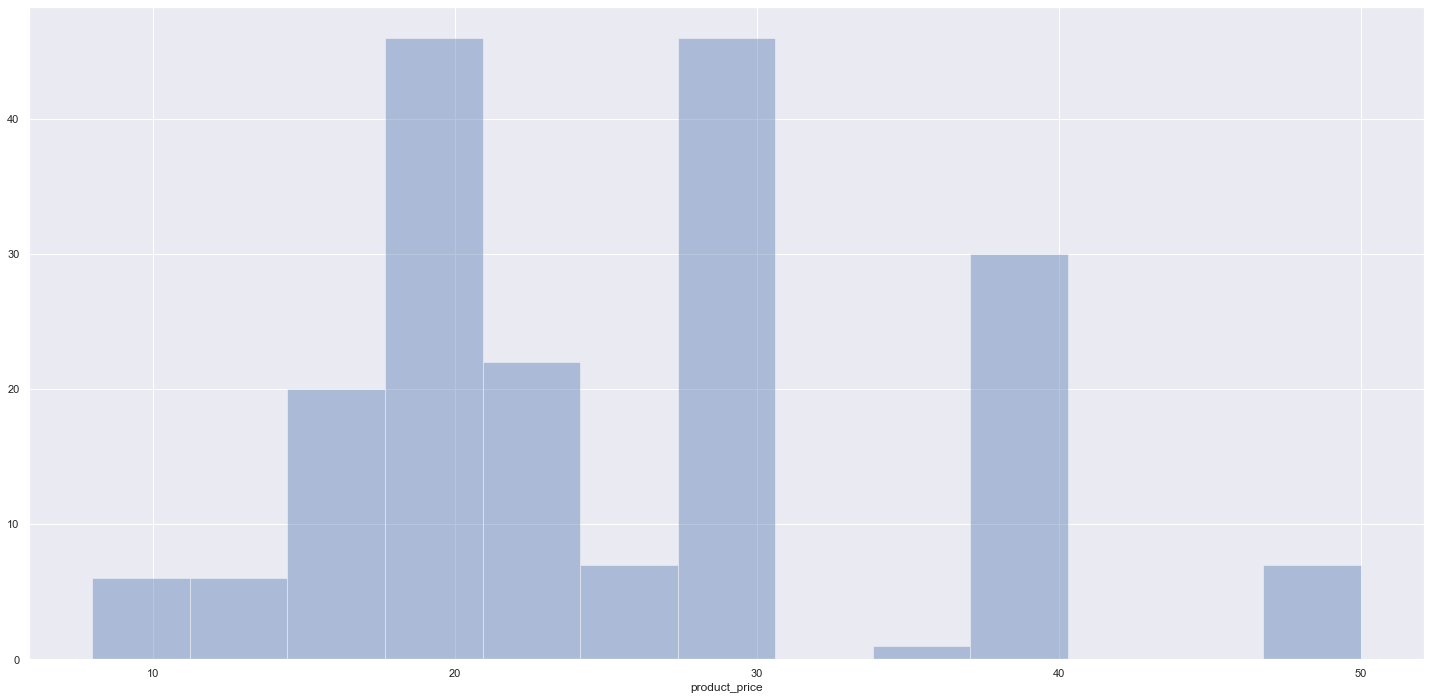

In [160]:
sns.distplot( df04['product_price'], kde=False );

#### 4.5.1.2. Numerical Variable

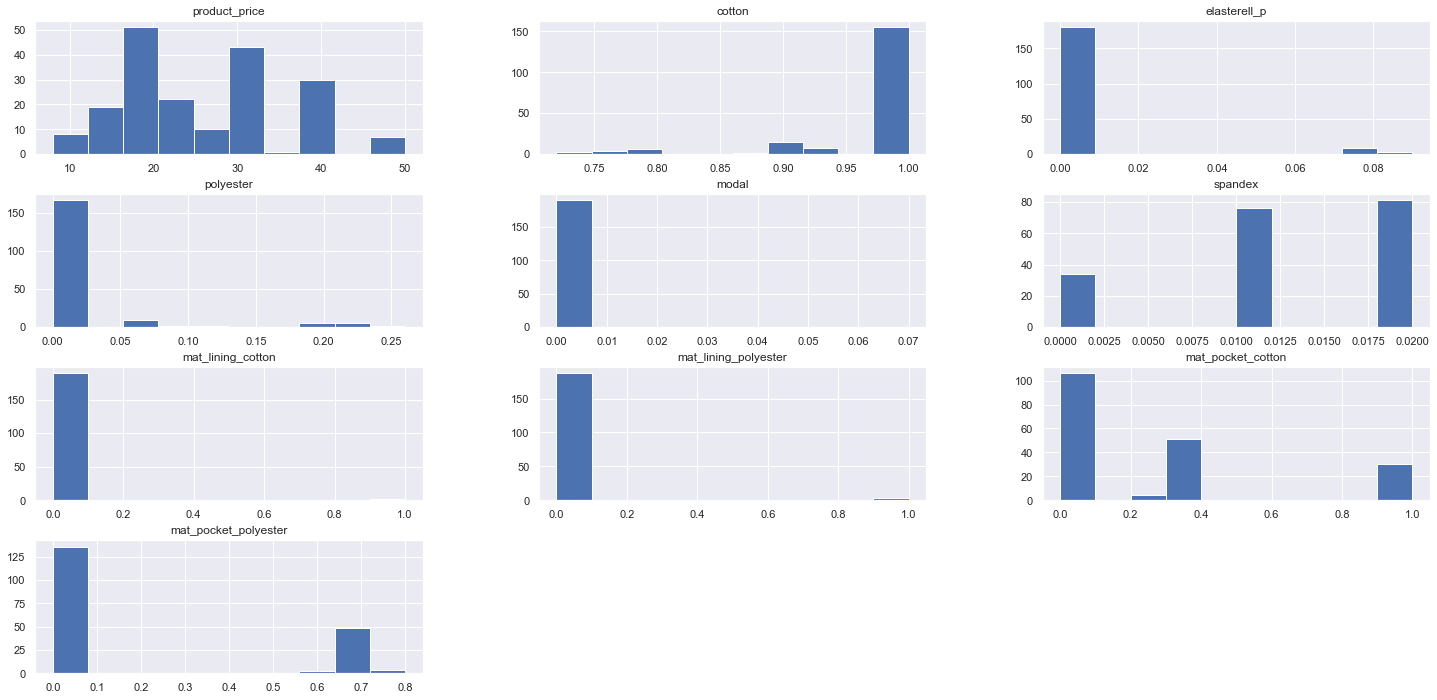

In [161]:
num_attributes.hist(bins=10);

#### 4.5.1.3. Categorical Variable

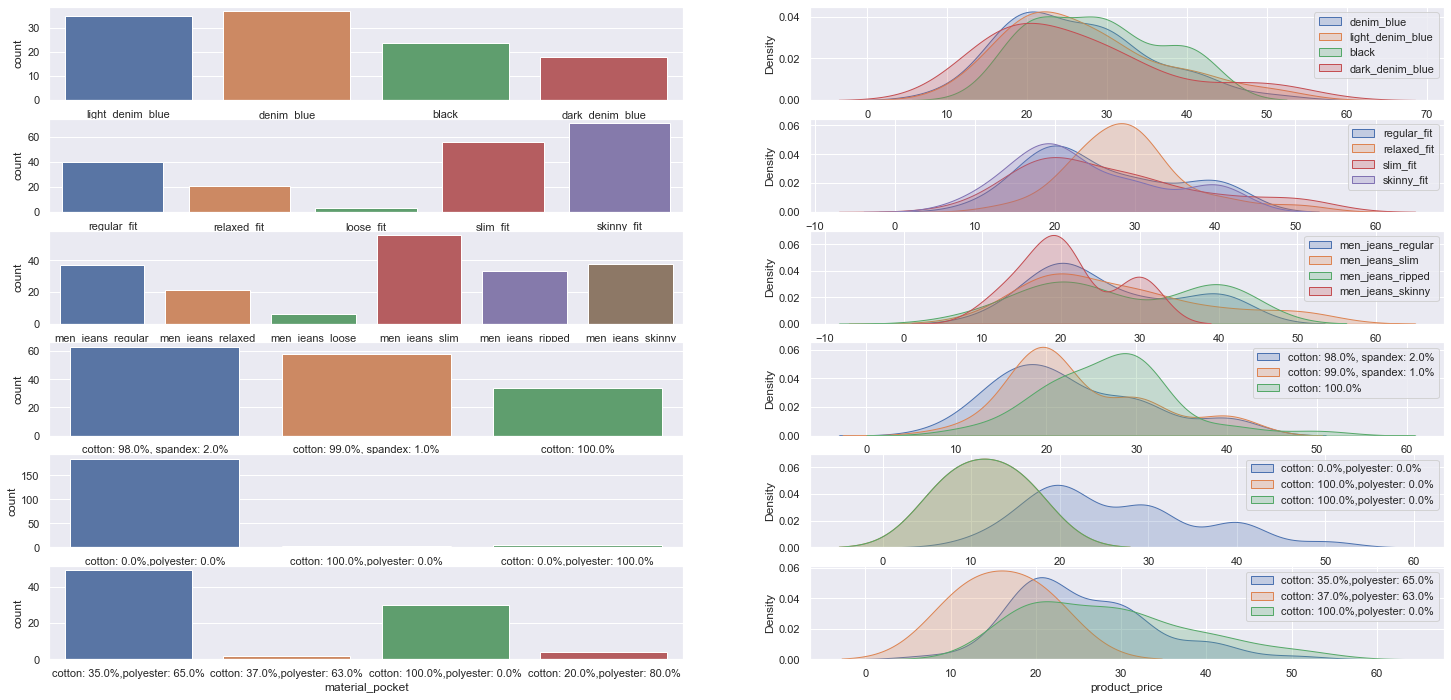

In [165]:
# color_name
plt.subplot(6, 2, 1)
df_aux = cat_attributes.loc[(cat_attributes['color_name'] == 'denim_blue') | (cat_attributes['color_name'] == 'light_denim_blue') | 
                            (cat_attributes['color_name'] == 'black') | (cat_attributes['color_name'] == 'dark_denim_blue')] 
sns.countplot( df_aux['color_name'] );

plt.subplot(6, 2, 2)
sns.kdeplot( df04[df04['color_name'] == 'denim_blue']['product_price'], label='denim_blue', shade=True );
sns.kdeplot( df04[df04['color_name'] == 'light_denim_blue']['product_price'], label='light_denim_blue', shade=True );
sns.kdeplot( df04[df04['color_name'] == 'black']['product_price'], label='black', shade=True );
sns.kdeplot( df04[df04['color_name'] == 'dark_denim_blue']['product_price'], label='dark_denim_blue', shade=True );
plt.legend();

# fit
plt.subplot(6, 2, 3)
sns.countplot( cat_attributes['fit'] );

plt.subplot(6, 2, 4)
sns.kdeplot( df04[df04['fit'] == 'regular_fit']['product_price'], label='regular_fit', shade=True );
sns.kdeplot( df04[df04['fit'] == 'relaxed_fit']['product_price'], label='relaxed_fit', shade=True );
sns.kdeplot( df04[df04['fit'] == 'loose_fit']['product_price'], label='loose_fit', shade=True );
sns.kdeplot( df04[df04['fit'] == 'slim_fit']['product_price'], label='slim_fit', shade=True );
sns.kdeplot( df04[df04['fit'] == 'skinny_fit']['product_price'], label='skinny_fit', shade=True );
plt.legend();

# product_category
plt.subplot(6, 2, 5)
sns.countplot( cat_attributes['product_category'] );

plt.subplot(6, 2, 6)
sns.kdeplot( df04[df04['product_category'] == 'men_jeans_regular']['product_price'], label='men_jeans_regular', shade=True );
#sns.kdeplot( df04[df04['product_category'] == 'men_jeans_relaxed']['product_price'], label='men_jeans_relaxed', shade=True );
#sns.kdeplot( df04[df04['product_category'] == 'men_jeans_loose']['product_price'], label='men_jeans_loose', shade=True );
sns.kdeplot( df04[df04['product_category'] == 'men_jeans_slim']['product_price'], label='men_jeans_slim', shade=True );
sns.kdeplot( df04[df04['product_category'] == 'men_jeans_ripped']['product_price'], label='men_jeans_ripped', shade=True );
sns.kdeplot( df04[df04['product_category'] == 'men_jeans_skinny']['product_price'], label='men_jeans_skinny', shade=True );
plt.legend();

# material_composition
plt.subplot(6, 2, 7)
df_aux = cat_attributes.loc[(cat_attributes['material_composition'] == 'cotton: 98.0%, spandex: 2.0%') | 
                            (cat_attributes['material_composition'] == 'cotton: 99.0%, spandex: 1.0%') | 
                            (cat_attributes['material_composition'] == 'cotton: 100.0%') ] 
sns.countplot( df_aux['material_composition'] );

plt.subplot(6, 2, 8)
sns.kdeplot( df04[df04['material_composition'] == 'cotton: 98.0%, spandex: 2.0%']['product_price'], label='cotton: 98.0%, spandex: 2.0%', shade=True );
sns.kdeplot( df04[df04['material_composition'] == 'cotton: 99.0%, spandex: 1.0%']['product_price'], label='cotton: 99.0%, spandex: 1.0%', shade=True );
sns.kdeplot( df04[df04['material_composition'] == 'cotton: 100.0%']['product_price'], label='cotton: 100.0%', shade=True );
plt.legend();

# material_lining
plt.subplot(6, 2, 9)
sns.countplot( cat_attributes['material_lining'] );

plt.subplot(6, 2, 10)
sns.kdeplot( df04[df04['material_lining'] == 'cotton: 0.0%,polyester: 0.0%']['product_price'], label='cotton: 0.0%,polyester: 0.0%', shade=True );
sns.kdeplot( df04[df04['material_lining'] == 'cotton: 100.0%,polyester: 0.0%']['product_price'], label='cotton: 100.0%,polyester: 0.0%', shade=True );
sns.kdeplot( df04[df04['material_lining'] == 'cotton: 100.0%,polyester: 0.0%']['product_price'], label='cotton: 100.0%,polyester: 0.0%', shade=True );
plt.legend();

# material_pocket
plt.subplot(6, 2, 11)
df_aux = cat_attributes.loc[cat_attributes['material_pocket'] != 'cotton: 0.0%,polyester: 0.0%']
sns.countplot( df_aux['material_pocket'] );


plt.subplot(6, 2, 12)
sns.kdeplot( df04[df04['material_pocket'] == 'cotton: 35.0%,polyester: 65.0%']['product_price'], label='cotton: 35.0%,polyester: 65.0%', shade=True );
sns.kdeplot( df04[df04['material_pocket'] == 'cotton: 37.0%,polyester: 63.0%']['product_price'], label='cotton: 37.0%,polyester: 63.0%', shade=True );
sns.kdeplot( df04[df04['material_pocket'] == 'cotton: 100.0%,polyester: 0.0%']['product_price'], label='cotton: 100.0%,polyester: 0.0%', shade=True );
#sns.kdeplot( df04[df04['material_pocket'] == 'cotton: 0.0%,polyester: 0.0%']['product_price'], label='cotton: 0.0%,polyester: 0.0%', shade=True );
sns.kdeplot( df04[df04['material_pocket'] == 'cotton: 20.0%,polyester: 80.0%']['product_price'], label='cotton: 20.0%,polyester: 80.0%', shade=True );
plt.legend();

### 4.5.2. Bivariate Analysis

#### **Insight 01:** Composition with 98% of cotton and 2% of spandex is the most common with a 33% presence in all products.

In [176]:
# percentage of material composition
df_aux1 = (
    df04[['product_id', 'material_composition']].groupby('material_composition').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per material composition
df_aux2 = df04[['product_price', 'material_composition']].groupby('material_composition').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['material_composition', 'mean_price']

df_aux = df_aux1.merge(df_aux2, on='material_composition', how='left')

# median price per material composition
df_aux3 = df04[['product_price', 'material_composition']].groupby('material_composition').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['material_composition', 'median_price']

df_aux = df_aux.merge(df_aux3, on='material_composition', how='left')

# maximum price per material composition
df_aux4 = df04[['product_price', 'material_composition']].groupby('material_composition').max().sort_values('product_price', ascending=False).reset_index()
df_aux4.columns = ['material_composition', 'max_price']

df_aux = df_aux.merge(df_aux4, on='material_composition', how='left')

# minimum price per material composition
df_aux5 = df04[['product_price', 'material_composition']].groupby('material_composition').min().sort_values('product_price', ascending=False).reset_index()
df_aux5.columns = ['material_composition', 'min_price']

df_aux = df_aux.merge(df_aux5, on='material_composition', how='left')

pd.options.display.max_colwidth = 100

display(df_aux.head())

# export dataframe to image
dfi.export(df_aux.head(), '../Images/data-insight-01.png' )

,material_composition,product_id,mean_price,median_price,max_price,min_price
0,"cotton: 98.0%, spandex: 2.0%",0.33,22.82,20.99,39.99,7.99
1,"cotton: 99.0%, spandex: 1.0%",0.30,23.82,19.99,39.99,7.99
2,cotton: 100.0%,0.18,26.93,29.99,49.99,10.99
3,"cotton: 90.0%, elasterell_p: 8.0%, spandex: 2.0%",0.04,37.24,32.49,49.99,24.99
4,"cotton: 93.0%, polyester: 6.0%, spandex: 1.0%",0.04,26.49,23.49,39.99,9.99


#### **Insight 02:** In average, each model has 6 different colors and the most common color are _Denim Blue, Light Denim Blue, Black, Dark Denim Blue, Dark Gray and Dark Blue_.

In [177]:
# percentage of colors
df_aux1 = (
    df04[['product_id', 'color_name']].groupby('color_name').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per color
df_aux2 = df04[['product_price', 'color_name']].groupby('color_name').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['color_name', 'mean_price']

df_aux = df_aux1.merge(df_aux2, on='color_name', how='left')

# median price per color
df_aux3 = df04[['product_price', 'color_name']].groupby('color_name').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['color_name', 'median_price']

df_aux = df_aux.merge(df_aux3, on='color_name', how='left')

display(df_aux.head(10))

# export dataframe to image
dfi.export(df_aux.head(10), '../Images/data-insight-02.png' )

# color per model
df_aux4 = df04[['model_code', 'color_name']].groupby('model_code').count().sort_values('color_name', ascending=False).reset_index()

# median of color per model
color_by_model = round(df_aux4['color_name'].median(), 2)

display(f"Colors by model: {color_by_model}")

,color_name,product_id,mean_price,median_price
0,denim_blue,0.19,26.18,24.99
1,light_denim_blue,0.18,27.13,22.99
2,black,0.13,28.74,29.99
3,dark_denim_blue,0.09,26.27,21.99
4,dark_gray,0.05,21.89,19.99
5,dark_blue,0.05,23.10,19.99
6,white,0.03,23.19,19.99
7,light_blue,0.02,22.99,18.49
8,black/washed_out,0.02,19.74,21.49
9,pale_denim_blue,0.02,33.32,29.99


'Colors by model: 6.0'

#### **Insight 03:** _Skinny Fit_ is the most common fit with a 37% presence in all products.

In [178]:
# percentage of fit 
df_aux1 = (
    df04[['product_id', 'fit']].groupby('fit').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per fit
df_aux2 = df04[['product_price', 'fit']].groupby('fit').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['fit', 'mean_price']

df_aux = df_aux1.merge(df_aux2, on='fit', how='left')

# median price per fit
df_aux3 = df04[['product_price', 'fit']].groupby('fit').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['fit', 'median_price']

df_aux = df_aux.merge(df_aux3, on='fit', how='left')

# maximum price per fit
df_aux4 = df04[['product_price', 'fit']].groupby('fit').max().sort_values('product_price', ascending=False).reset_index()
df_aux4.columns = ['fit', 'max_price']

df_aux = df_aux.merge(df_aux4, on='fit', how='left')

# minimum price per fit
df_aux5 = df04[['product_price', 'fit']].groupby('fit').min().sort_values('product_price', ascending=False).reset_index()
df_aux5.columns = ['fit', 'min_price']

df_aux = df_aux.merge(df_aux5, on='fit', how='left')


display(df_aux)

# export dataframe to image
dfi.export(df_aux, '../Images/data-insight-03.png' )

,fit,product_id,mean_price,median_price,max_price,min_price
0,skinny_fit,0.37,24.12,19.99,39.99,7.99
1,slim_fit,0.29,27.13,22.99,49.99,7.99
2,regular_fit,0.21,25.99,21.99,39.99,10.99
3,relaxed_fit,0.11,29.13,29.99,49.99,14.99
4,loose_fit,0.02,29.99,29.99,29.99,29.99


#### **Insight 04:** The most popular product category is _Men Jeans Slim_ with a 29% of presence in all products.

In [179]:
# percentage product category
df_aux1 = (
    df04[['product_id', 'product_category']].groupby('product_category').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per product category
df_aux2 = df04[['product_price', 'product_category']].groupby('product_category').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['product_category', 'price_mean']
df_aux = df_aux1.merge(df_aux2, on='product_category', how='left')

# median price per product category
df_aux3 = df04[['product_price', 'product_category']].groupby('product_category').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['product_category', 'price_median']

df_aux = df_aux.merge(df_aux3, on='product_category', how='left')

# maximum price per product category
df_aux4 = df04[['product_price', 'product_category']].groupby('product_category').max().sort_values('product_price', ascending=False).reset_index()
df_aux4.columns = ['product_category', 'price_max']

df_aux = df_aux.merge(df_aux4, on='product_category', how='left')

# minimum price per product category
df_aux5 = df04[['product_price', 'product_category']].groupby('product_category').min().sort_values('product_price', ascending=False).reset_index()
df_aux5.columns = ['product_category', 'price_min']

df_aux = df_aux.merge(df_aux5, on='product_category', how='left')


display(df_aux)

# export dataframe to image
dfi.export(df_aux, '../Images/data-insight-04.png' )

,product_category,product_id,price_mean,price_median,price_max,price_min
0,men_jeans_slim,0.29,27.13,22.99,49.99,7.99
1,men_jeans_skinny,0.20,20.94,19.99,29.99,9.99
2,men_jeans_regular,0.19,25.99,20.99,39.99,10.99
3,men_jeans_ripped,0.17,27.78,24.99,39.99,7.99
4,men_jeans_relaxed,0.11,29.13,29.99,49.99,14.99
5,men_jeans_loose,0.03,27.99,29.99,29.99,17.99


#### **Insight 05:** Elasterell-P and Polyester are the composions that have most influence in product price with a correlation of 0.38 and 0.27, respectively.

In [184]:
# price correlation
correlation = num_attributes.corr(method='pearson')
df_aux1 = pd.DataFrame(correlation['product_price'].sort_values(ascending=False))

# mean price for elasterell_p
df_aux2 = df04[['product_price', 'elasterell_p']].groupby('elasterell_p').mean().sort_values('elasterell_p', ascending=False).reset_index()
df_aux2.columns = ['elasterell_p', 'mean_price']

# median price for elasterell_p
df_aux3 = df04[['product_price', 'elasterell_p']].groupby('elasterell_p').median().sort_values('elasterell_p', ascending=False).reset_index()
df_aux3.columns = ['elasterell_p', 'median_price']

df_aux4 = df_aux2.merge(df_aux3, on='elasterell_p', how='left')

# mean price for polyester
df_aux5 = df04[['product_price', 'polyester']].groupby('polyester').mean().sort_values('polyester', ascending=False).reset_index()
df_aux5.columns = ['polyester', 'mean_price']

# median price for polyester
df_aux6 = df04[['product_price', 'polyester']].groupby('polyester').median().sort_values('polyester', ascending=False).reset_index()
df_aux6.columns = ['polyester', 'median_price']

df_aux7 = df_aux5.merge(df_aux6, on='polyester', how='left')

# mean price for cotton
df_aux8 = df04[['product_price', 'cotton']].groupby('cotton').mean().sort_values('cotton', ascending=False).reset_index()
df_aux8.columns = ['cotton', 'mean_price']

# median price for cotton
df_aux9 = df04[['product_price', 'cotton']].groupby('cotton').median().sort_values('cotton', ascending=False).reset_index()
df_aux9.columns = ['cotton', 'median_price']

df_aux10 = df_aux8.merge(df_aux9, on='cotton', how='left')

# display dataframes side by side
df_aux11 = df_aux1.style.format({'product_price': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('model_code')
df_aux12 = df_aux4.style.format({'elasterell_p': "{:.2f}", 'mean_price': "{:.2f}", 'median_price': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('model_code')
df_aux13 = df_aux7.style.format({'polyester': "{:.2f}", 'mean_price': "{:.2f}", 'median_price': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('model_code')
df_aux14 = df_aux10.style.format({'cotton': "{:.2f}", 'mean_price': "{:.2f}", 'median_price': "{:.2f}"}).set_table_attributes("style='display:inline'").set_caption('model_code')

display_html(df_aux11._repr_html_()+df_aux12._repr_html_()+df_aux13._repr_html_()+df_aux14._repr_html_(), raw=True)

# export dataframe to image
dfi.export(df_aux1, '../Images/data-insight-05_01.png' )
dfi.export(df_aux4, '../Images/data-insight-05_02.png' )
dfi.export(df_aux7, '../Images/data-insight-05_03.png' )
dfi.export(df_aux10, '../Images/data-insight-05_04.png' )

,product_price
product_price,1.00
elasterell_p,0.38
polyester,0.27
mat_pocket_cotton,0.12
modal,0.11
mat_pocket_polyester,0.09
mat_lining_polyester,0.04
spandex,0.00
mat_lining_cotton,-0.16
cotton,-0.39


#### **Insight 06:** Lining composition with 100% polyester is  most common but with a small sample of only 2% of products.

In [185]:
# percentage of material_lining
df_aux1 = (
    df04[['product_id', 'material_lining']].groupby('material_lining').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per material_lining
df_aux2 = df04[['product_price', 'material_lining']].groupby('material_lining').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['material_lining', 'mean_price']

# median price per material_lining
df_aux3 = df04[['product_price', 'material_lining']].groupby('material_lining').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['material_lining', 'median_price']

# merge dataframes
df_aux = df_aux1.merge(df_aux2, on='material_lining', how='left')
df_aux = df_aux.merge(df_aux3, on='material_lining', how='left')

pd.options.display.max_colwidth = 100

display(df_aux)

# export dataframe to image
dfi.export(df_aux, '../Images/data-insight-06.png' )

,material_lining,product_id,mean_price,median_price
0,"cotton: 0.0%,polyester: 0.0%",0.97,26.14,22.99
1,"cotton: 0.0%,polyester: 100.0%",0.02,28.74,26.99
2,"cotton: 100.0%,polyester: 0.0%",0.01,11.49,11.49


#### **Insight 07:** Pocket composition with 35% of cotton and 65% of polyester is most common with 26% of presence of all products.

In [186]:
# material_pocket
# percentage of material_pocket
df_aux1 = (
    df04[['product_id', 'material_pocket']].groupby('material_pocket').count()/df04['product_id'].count()
).sort_values('product_id', ascending=False).reset_index()

# mean price per material_pocket
df_aux2 = df04[['product_price', 'material_pocket']].groupby('material_pocket').mean().sort_values('product_price', ascending=False).reset_index()
df_aux2.columns = ['material_pocket', 'mean_price']

# median price per material_pocket
df_aux3 = df04[['product_price', 'material_pocket']].groupby('material_pocket').median().sort_values('product_price', ascending=False).reset_index()
df_aux3.columns = ['material_pocket', 'median_price']

# merge dataframes
df_aux = df_aux1.merge(df_aux2, on='material_pocket', how='left')
df_aux = df_aux.merge(df_aux3, on='material_pocket', how='left')

pd.options.display.max_colwidth = 100

display(df_aux.head())

# export dataframe to image
dfi.export(df_aux.head(), '../Images/data-insight-07.png' )

,material_pocket,product_id,mean_price,median_price
0,"cotton: 0.0%,polyester: 0.0%",0.55,24.87,22.99
1,"cotton: 35.0%,polyester: 65.0%",0.26,25.50,22.99
2,"cotton: 100.0%,polyester: 0.0%",0.16,28.52,29.99
3,"cotton: 20.0%,polyester: 80.0%",0.02,49.99,49.99
4,"cotton: 37.0%,polyester: 63.0%",0.01,15.99,15.99


In [ ]:
# Não temos o dado de interesse: numero de vendas

# Media de preço


# Precificação por estrategia de mercado

# Fazer imagens do processo de scrapy

# Fazer imagem do schema das tabelas